## Examen Parcial 2

### Hernández Martínez Oscar Gerardo

Carga de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.filters.hp_filter import hpfilter
import statsmodels.api as sm
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

## 1. Estacionariedad y transformaciones

Carga de datos

In [2]:
df = pd.read_csv("cancun - cancun.csv", encoding = "ISO-8859-1")
df.set_index('Mes',inplace=True)
df.columns=['Interes']
df.index= pd.to_datetime(df.index, yearfirst = True)

Exploración de los datos

In [3]:
df

,Interes
Mes,
2004-01-01,75
2004-02-01,77
2004-03-01,78
2004-04-01,65
2004-05-01,59
...,...
2020-12-01,34
2021-01-01,42
2021-02-01,56


In [4]:
df.describe()

,Interes
count,208.000000
mean,41.384615
std,13.158130
min,15.000000
25%,32.000000
50%,39.000000
75%,47.000000
max,100.000000


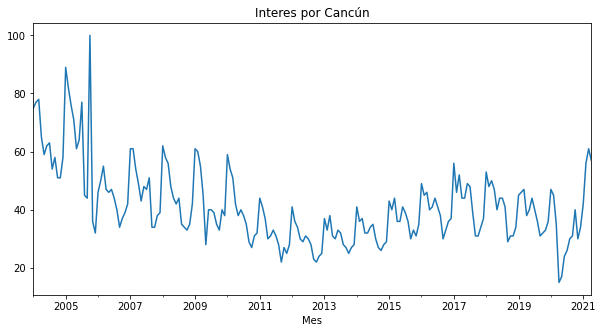

In [5]:
df.Interes.plot(figsize=(10,5))
plt.title("Interes por Cancún")
plt.show()

Prueba de Dickey-Fuller para estacionariedad

In [6]:
sts.adfuller(df.Interes)

(-2.978775548549199,
 0.03692460078322182,
 13,
 194,
 {'1%': -3.4645146202692527,
  '5%': -2.8765564361715534,
  '10%': -2.5747745328940375},
 1341.825344051238)

In [7]:
sts.adfuller(df.Interes)[0] < sts.adfuller(df.Interes)[4]['5%']

True

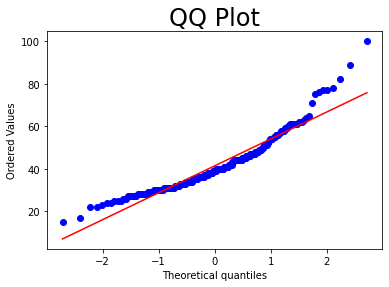

In [8]:
ss.probplot(df.Interes, plot = plt)
plt.title("QQ Plot", size = 24)
plt.show()

### La serie no es estacionaria. 

OBS: La prueba de Dickey-Fuller sugiere que, a un nivel de significancia del $5\%$, la serie puede aceptarse como estacionaria. Sin embargo, dada la gráfica de esta serie y el QQ-Plot, podemos determinar que la serie no es estacionaria.

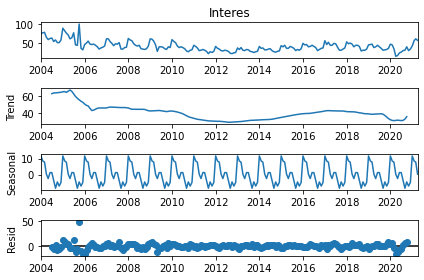

In [9]:
d_est_aditiva = seasonal_decompose(df.Interes, model = "additive")
d_est_aditiva.plot()
plt.show()

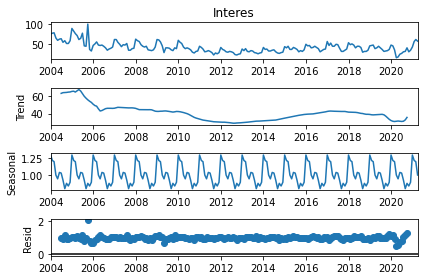

In [10]:
d_est_multiplicativa = seasonal_decompose(df.Interes, model = "multiplicative")
d_est_multiplicativa.plot()
plt.show()

Con estos gráficos, podemos ver que la serie tiene un componente de Estacionalidad el cual parece darse a fines de un año e inicios del siguiente.

In [11]:
Interes_cycle, Interes_trend = hpfilter(df.Interes, lamb = 129600)

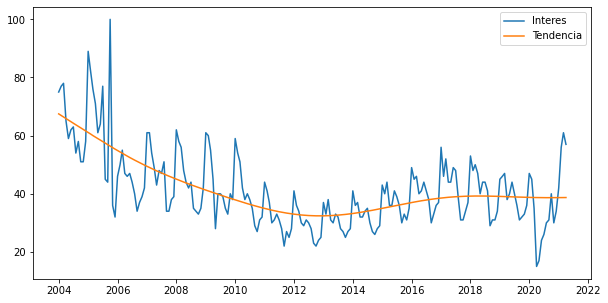

In [12]:
legend = {"Interes":df.Interes, "Tendencia":Interes_trend}
plt.figure(figsize = (10,5))
plt.plot(df)
plt.plot(Interes_trend)
plt.legend(legend)
plt.show()

Uno de los posibles métodos de transformación que podemos aplicar es el de la transformación logarítmica:

In [13]:
df_log = pd.DataFrame(np.log(df.Interes))

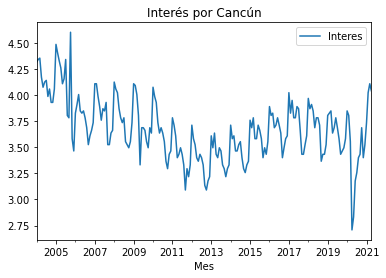

In [14]:
df_log.plot(title = "Interés por Cancún");

In [15]:
Interes_cycle, Interes_trend = hpfilter(df_log.Interes, lamb = 129600)

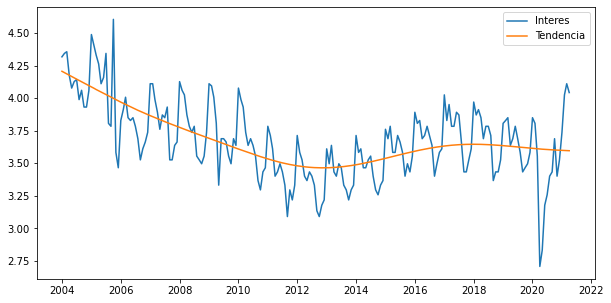

In [16]:
legend = {"Interes":df_log.Interes, "Tendencia":Interes_trend}
plt.figure(figsize = (10,5))
plt.plot(df_log)
plt.plot(Interes_trend)
plt.legend(legend)
plt.show()

Aquí se puede observar que, si bien la transformación logarítmica parece tener el mismo comportamiento, lo cierto es que dada la escala los movimientos son mucho menos agresivos.

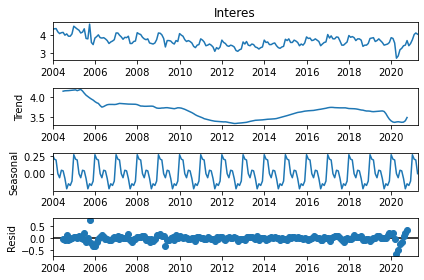

In [17]:
d_est_aditiva = seasonal_decompose(df_log.Interes, model = "additive")
d_est_aditiva.plot()
plt.show()

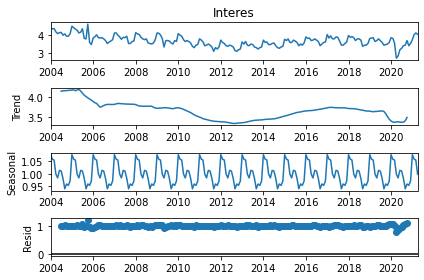

In [18]:
d_est_multiplicativa = seasonal_decompose(df_log.Interes, model = "multiplicative")
d_est_multiplicativa.plot()
plt.show()

Pese a la transformación logarítmica, no parece ser que se obtenga una diferencia significativa, se procederá a realizar diferencias:

In [19]:
df_1 = df.diff().dropna()
df_2 = df.diff().diff().dropna()
df_3 = df.diff().diff().diff().dropna()
df_4 = df.diff().diff().diff().diff().dropna()

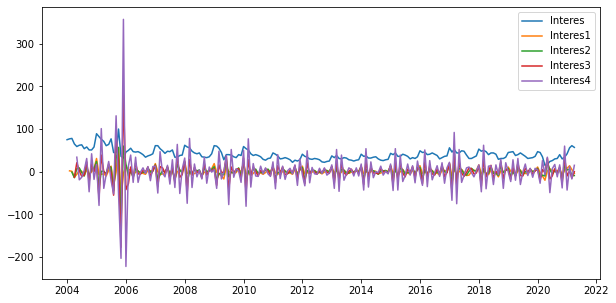

In [20]:
legends = {"Interes":df, "Interes1":df_1, "Interes2":df_2, "Interes3":df_3, "Interes4":df_4}
plt.figure(figsize = (10,5))
plt.plot(df)
plt.plot(df_1)
plt.plot(df_2)
plt.plot(df_3)
plt.plot(df_4)
plt.legend(legends)
plt.show()

Como podemos observar, las primeras 3 diferencias parecen ser estacionarias, sin embargo, la cuarta pese a también ser estacionaria, presenta movimientos mucho más bruscos, por lo que se procederá a analizar solo las primeras 3 para tomar una decisión.

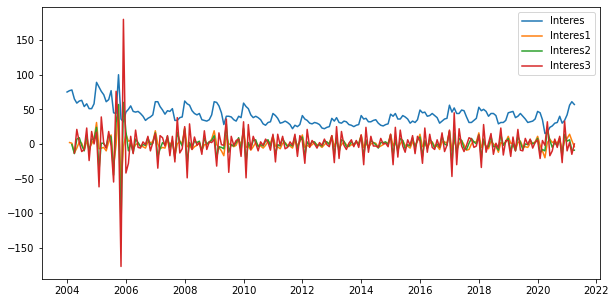

In [21]:
plt.figure(figsize = (10,5))
plt.plot(df)
plt.plot(df_1)
plt.plot(df_2)
plt.plot(df_3)
plt.legend(legends)
plt.show()

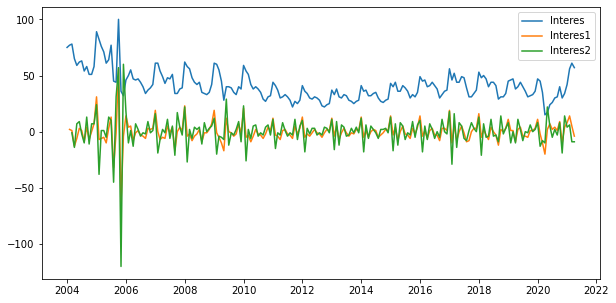

In [22]:
plt.figure(figsize = (10,5))
plt.plot(df)
plt.plot(df_1)
plt.plot(df_2)
plt.legend(legends)
plt.show()

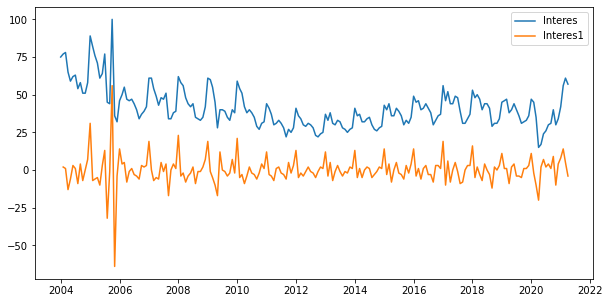

In [23]:
plt.figure(figsize = (10,5))
plt.plot(df)
plt.plot(df_1)
plt.legend(legends)
plt.show()

Dadas estas visualizaciones, se optará por trabajar con solo una diferencia.

#### Obs. 

A veces, el problema con el método de Dickey-Fuller es que no es capaz de detectar Heterocedasticidad, por lo que veremos ahora las varianzas de los datos con respecto a la primer diferencia.

In [24]:
print(df.std())
print(df_1.std())

Interes    13.15813
dtype: float64
Interes    9.416582
dtype: float64


Observamos que la varianza es menor para la primer diferencia.

## 2. ACF y PACF

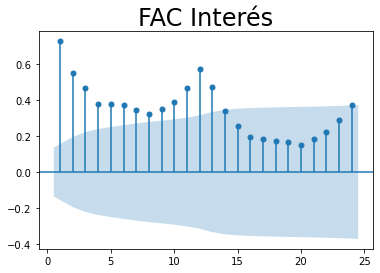

In [25]:
sgt.plot_acf(df.Interes, zero = False)
plt.title("FAC Interés", size = 24)
plt.show()

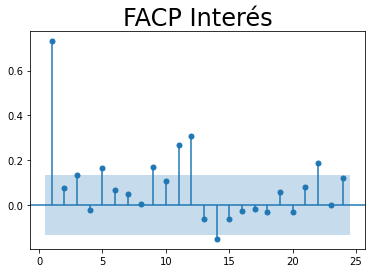

In [26]:
sgt.plot_pacf(df.Interes, zero = False, method = ('ols'))
plt.title("FACP Interés", size = 24)
plt.show()

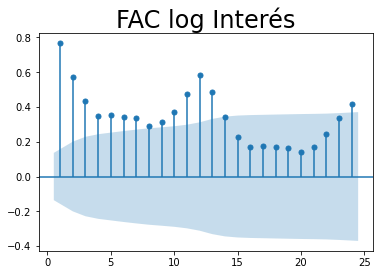

In [27]:
sgt.plot_acf(df_log.Interes, zero = False)
plt.title("FAC log Interés", size = 24)
plt.show()

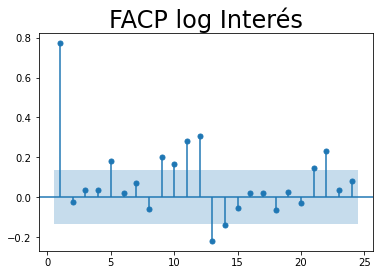

In [28]:
sgt.plot_pacf(df_log.Interes, zero = False, method = ('ols'))
plt.title("FACP log Interés", size = 24)
plt.show()

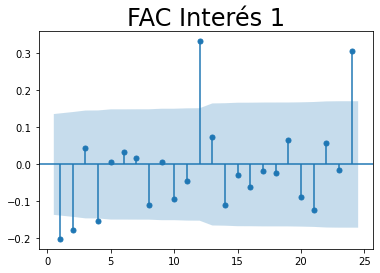

In [29]:
sgt.plot_acf(df_1.Interes, zero = False)
plt.title("FAC Interés 1", size = 24)
plt.show()

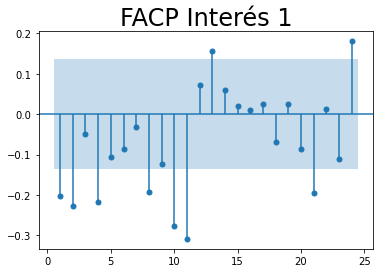

In [30]:
sgt.plot_pacf(df_1.Interes, zero = False, method = ('ols'))
plt.title("FACP Interés 1", size = 24)
plt.show()

Observamos que la ACF y PACF de los datos originales y de la transformación logarítmica son similares. 

Las gráficas de la primer diferencia sí presenta cambios.

De aquí, podemos obtener algunos puntos de interés para aplicar nuestros modelos.

De aquí, tomaremos los puntos 1,2,4,8,10,12 y de acuerdo a estos, haremos las pruebas.

In [31]:
sts.adfuller(df_1.Interes)

(-4.8149545255121735,
 5.091446572406075e-05,
 12,
 194,
 {'1%': -3.4645146202692527,
  '5%': -2.8765564361715534,
  '10%': -2.5747745328940375},
 1344.0965031444825)

Gracias a esta prueba, podemos ver que esta tranformación sí es estacionaria.

## 3. Modelos

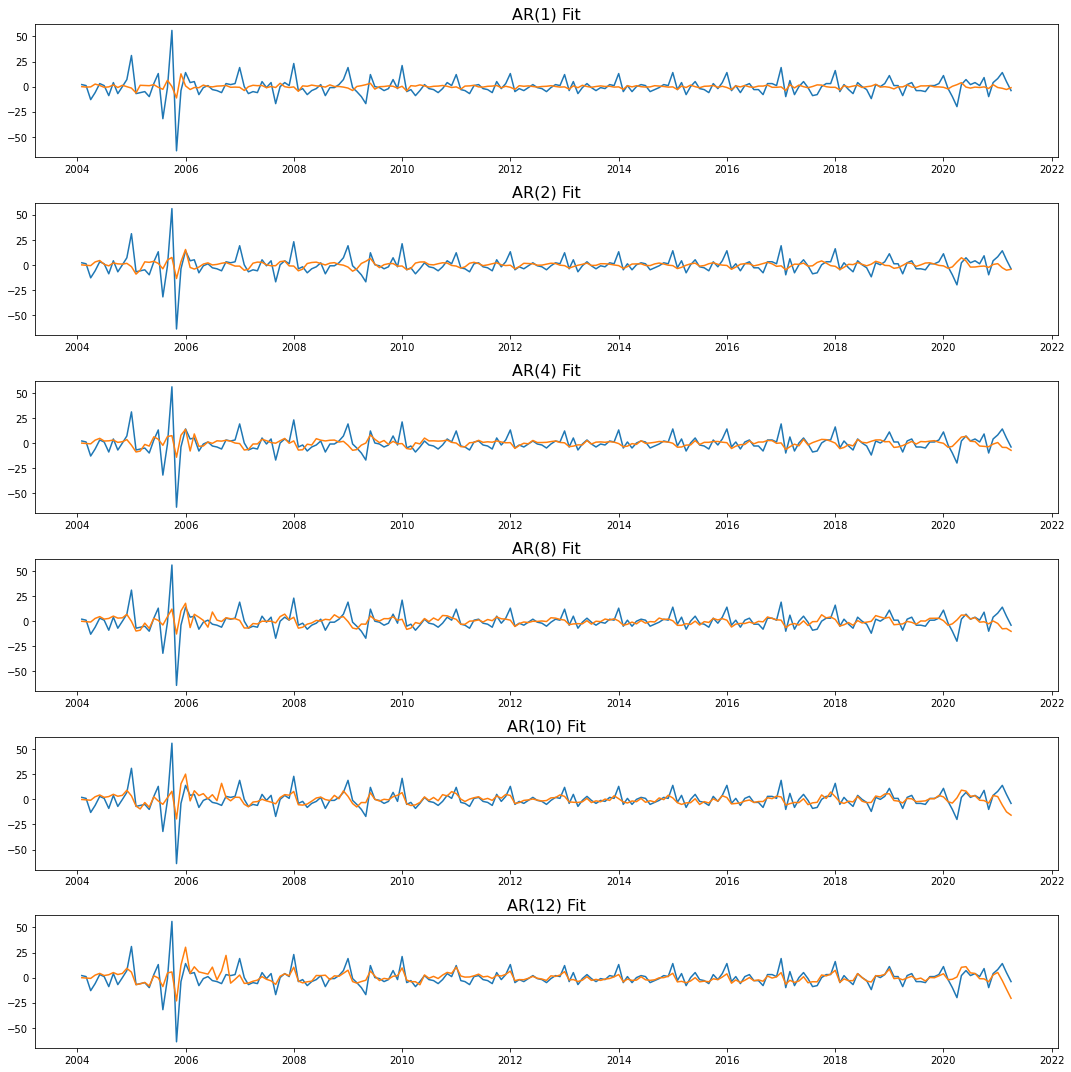

In [32]:
plt.figure(figsize=(15,15))

ar_orders = [1,2,4,8,10,12]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    ar_model = ARMA(df_1, order=(ar_order,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(6,1,idx+1)
    plt.plot(df_1)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

In [33]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1512.2984947416953
AIC for AR(2): 1503.4592133606488
AIC for AR(4): 1497.1661262734228
AIC for AR(8): 1493.8894578558295
AIC for AR(10): 1479.649877434108
AIC for AR(12): 1464.2375156443054


In [34]:
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1522.2966511214913
BIC for AR(2): 1516.7900885337103
BIC for AR(4): 1517.162439033015
BIC for AR(8): 1527.2166457884832
BIC for AR(10): 1519.6425029532925
BIC for AR(12): 1510.8955787500206


De estos resultados, el modelo AIC arroja el resultado más pequeño para 10. 

Mientras que el modelo BIC arroja el resultado más pequeño para 2. 

Se procederá a realizar pruebas con el fin de encontrar el que mejor se ajuste.

In [35]:
model = ARIMA(df.Interes, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Interes   No. Observations:                  207
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -737.267
Method:                       css-mle   S.D. of innovations              8.504
Date:                Thu, 08 Apr 2021   AIC                           1484.533
Time:                        19:33:39   BIC                           1501.197
Sample:                    02-01-2004   HQIC                          1491.272
                         - 04-01-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1255      0.107     -1.174      0.240      -0.335       0.084
ar.L1.D.Interes     0.5335      0.077      6.954      0.000       0.383       0.684
ar.L2.D.Interes    -0.0647      

In [36]:
model = ARIMA(df.Interes, order=(4,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Interes   No. Observations:                  207
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -734.673
Method:                       css-mle   S.D. of innovations              8.395
Date:                Thu, 08 Apr 2021   AIC                           1483.345
Time:                        19:33:40   BIC                           1506.674
Sample:                    02-01-2004   HQIC                          1492.779
                         - 04-01-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1287      0.108     -1.190      0.234      -0.341       0.083
ar.L1.D.Interes     0.5045      0.080      6.325      0.000       0.348       0.661
ar.L2.D.Interes    -0.0924      

In [37]:
model = ARIMA(df.Interes, order = (10,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Interes   No. Observations:                  207
Model:                ARIMA(10, 1, 1)   Log Likelihood                -723.651
Method:                       css-mle   S.D. of innovations              7.935
Date:                Thu, 08 Apr 2021   AIC                           1473.302
Time:                        19:33:42   BIC                           1516.627
Sample:                    02-01-2004   HQIC                          1490.823
                         - 04-01-2021                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1236      0.106     -1.161      0.246      -0.332       0.085
ar.L1.D.Interes     -0.0141      0.125     -0.113      0.910      -0.259       0.231
ar.L2.D.Interes     -0.3192 

In [38]:
model = ARIMA(df.Interes, order=(12,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.Interes   No. Observations:                  207
Model:                ARIMA(12, 1, 1)   Log Likelihood                -716.479
Method:                       css-mle   S.D. of innovations              7.649
Date:                Thu, 08 Apr 2021   AIC                           1462.958
Time:                        19:33:50   BIC                           1512.949
Sample:                    02-01-2004   HQIC                          1483.174
                         - 04-01-2021                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0963      0.141     -0.680      0.496      -0.374       0.181
ar.L1.D.Interes      0.1933      0.179      1.079      0.281      -0.158       0.544
ar.L2.D.Interes     -0.1738 

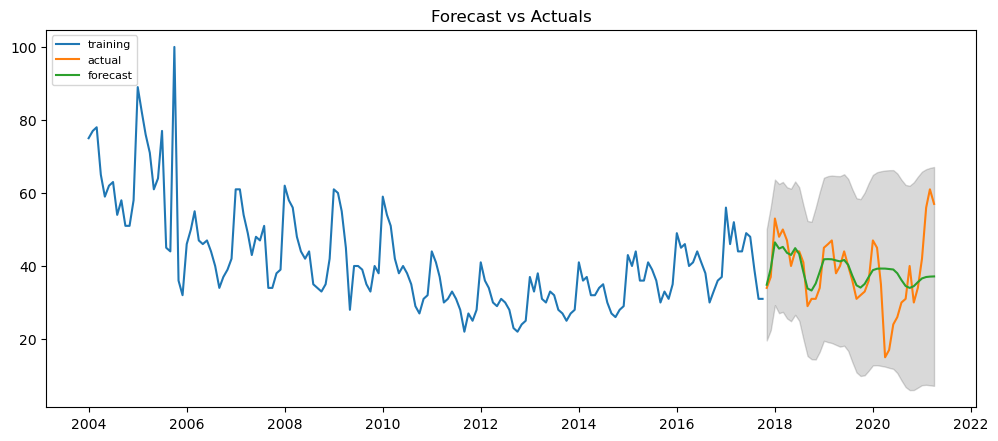

In [39]:
h = 42
train = df.Interes[:(208-h)]
test = df.Interes[(208-h):]

model = ARIMA(train, order=(12,1,1))  
fitted = model.fit(disp=0)  


fc, se, conf = fitted.forecast(h, alpha=0.05)  # 95% conf


fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

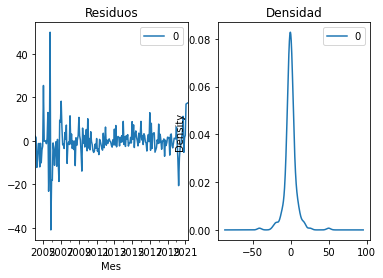

In [40]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuos", ax=ax[0])
residuals.plot(kind='kde', title='Densidad', ax=ax[1])
plt.show()

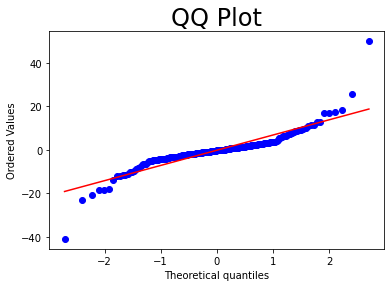

In [41]:
ss.probplot(model_fit.resid, plot = plt)
plt.title("QQ Plot", size = 24)
plt.show()

Con los gráficos anteriores, podemos decir que para este modelo, los errores siguen en su mayoría una distribucion normal.

## 5. Decisión

Con los gráficos de Estacionalidad, podemos observar que el comportamiento de aumento en el interés por Cancún durante el final de un año y principios del siguiente es repetitivo. 

Después de este análisis, considero que el aumento en los precios de las habitaciones **no es recomendable** pues con la existencia de la nueva vacuna contra el SARS-CoV-2 y observando la tendencia, sería buena estrategia rebajar el precio de las habitaciones para aumentar el interés de las personas y captar aún más huéspedes. 

Una vez exista escasez de habitaciones, entonces se puede elevar el precio. 

## ADICIONAL

Se podría construir un modelo eliminando los datos atípicos, sin embargo, tratándose de series de tiempo, esto puede causar problemas pues las series de tiempo requieren un distanciamiento de los datos constante. 

In [42]:
Q1 = np.percentile(df, 25)

Q3 = np.percentile(df, 75)

RIC = Q3-Q1

crit1 = Q1-1.5*RIC

crit2 = Q3+1.5*RIC

In [43]:
l1 = df.Interes >= crit1

l2 = df.Interes <= crit2

crit_compl = l1 & l2

df_sat = df[crit_compl]

df_sat

,Interes
Mes,
2004-04-01,65
2004-05-01,59
2004-06-01,62
2004-07-01,63
2004-08-01,54
...,...
2020-12-01,34
2021-01-01,42
2021-02-01,56


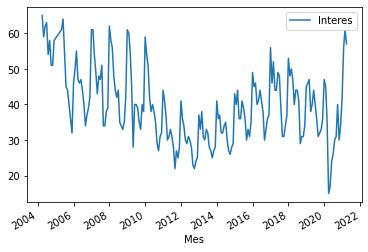

In [44]:
df_sat.plot();

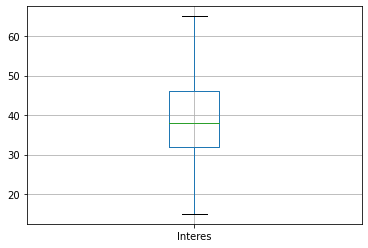

In [45]:
df_sat.boxplot();